In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

In [2]:
data = pd.read_csv('Money_Laundering_Dataset.csv')

In [3]:
copy_data = data.copy()

In [4]:
data

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,99996.0,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,99997.0,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,99998.0,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [5]:
import random
np.random.seed(42)
random.seed(42)

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      99997 non-null   float64
 1   step            99323 non-null   float64
 2   type            100000 non-null  object 
 3   amount          100000 non-null  float64
 4   nameOrig        99990 non-null   object 
 5   oldbalanceOrg   99857 non-null   float64
 6   newbalanceOrig  99978 non-null   float64
 7   nameDest        99996 non-null   object 
 8   oldbalanceDest  99948 non-null   float64
 9   newbalanceDest  100000 non-null  float64
 10  isFraud         99683 non-null   float64
 11  isFlaggedFraud  99929 non-null   float64
dtypes: float64(9), object(3)
memory usage: 9.2+ MB


In [7]:
data.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,99997.000000,99323.000000,1.000000e+05,9.985700e+04,9.997800e+04,9.994800e+04,1.000000e+05,99683.000000,99929.000000
mean,50000.972579,8.496229,1.736022e+05,8.789148e+05,8.942587e+05,8.805609e+05,1.184041e+06,0.004163,0.000010
std,28866.838833,1.831287,3.443003e+05,2.674992e+06,2.711584e+06,2.402526e+06,2.802350e+06,0.064389,0.003163
min,0.000000,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,25002.000000,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,50001.000000,9.000000,5.274552e+04,2.010000e+04,0.000000e+00,2.082250e+04,4.990918e+04,0.000000,0.000000
75%,75000.000000,10.000000,2.117631e+05,1.908585e+05,2.149436e+05,5.881914e+05,1.058186e+06,0.000000,0.000000
max,99999.000000,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000


In [8]:
#this data is imbalanced and highly scaled
print("max amount",data['amount'].max())
print("min amount",data['amount'].min())

max amount 10000000.0
min amount 0.32


In [9]:
ML_df =data[data['isFraud'] == 1]
NoML_df = data[data['isFraud'] == 0]

print("Total No of Transactions =", len(data['isFraud']))

print("Total No of identified Money Laundered Transactions =", len(ML_df))
print("Percentage of identified Money Laundered Transactions =", 1.*len(ML_df)/len(data['isFraud'])*100.0, "%")
 
print("Total No of  NOT  money laundering transactions =", len(NoML_df))
print("Percentage of NOT money laundering transactions =", 1.*len(NoML_df)/len(data['isFraud'])*100.0, "%")

Total No of Transactions = 100000
Total No of identified Money Laundered Transactions = 415
Percentage of identified Money Laundered Transactions = 0.415 %
Total No of  NOT  money laundering transactions = 99268
Percentage of NOT money laundering transactions = 99.268 %


<Axes: >

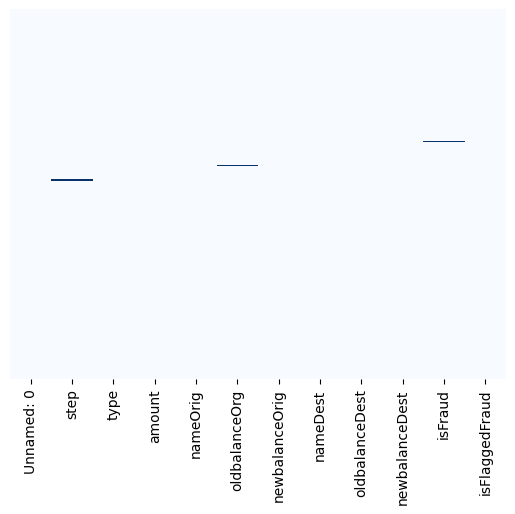

In [10]:
#dealing with missing data
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [11]:
#filling missing values    
data = data.fillna(data.select_dtypes(include=['number']).median())

<Axes: >

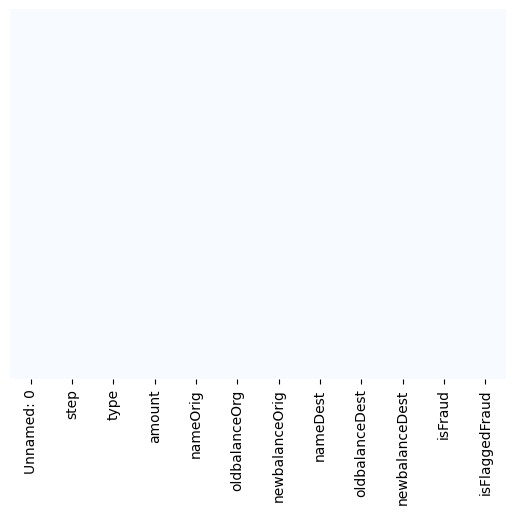

In [12]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
data.columns

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [14]:
#Let's see if there is relationship between types of transaction and Money laundering transaction
data['type'].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

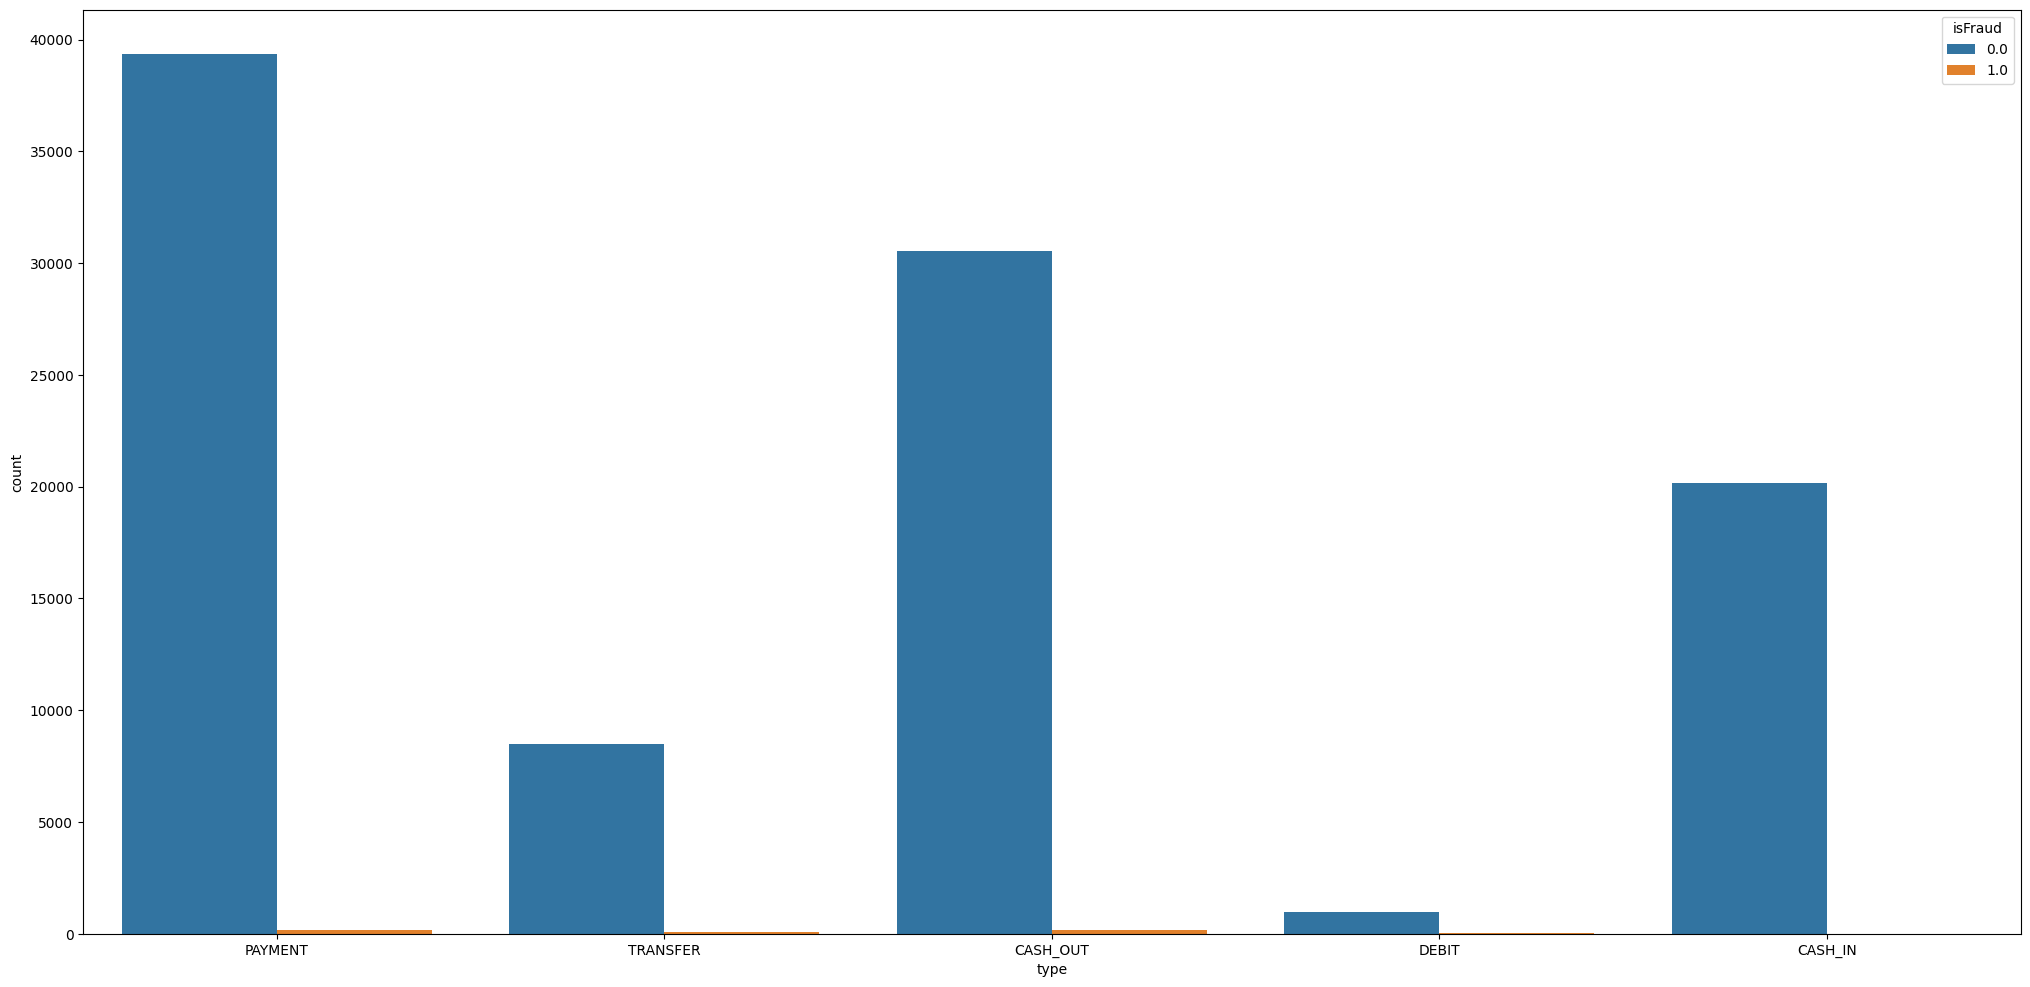

In [15]:
#create scatter plot for fraud
plt.figure(figsize= [25, 12])
sns.countplot(x = 'type', hue = 'isFraud' , data = data)

Text(0.5, 0, 'Money Laundering in comparision to amount')

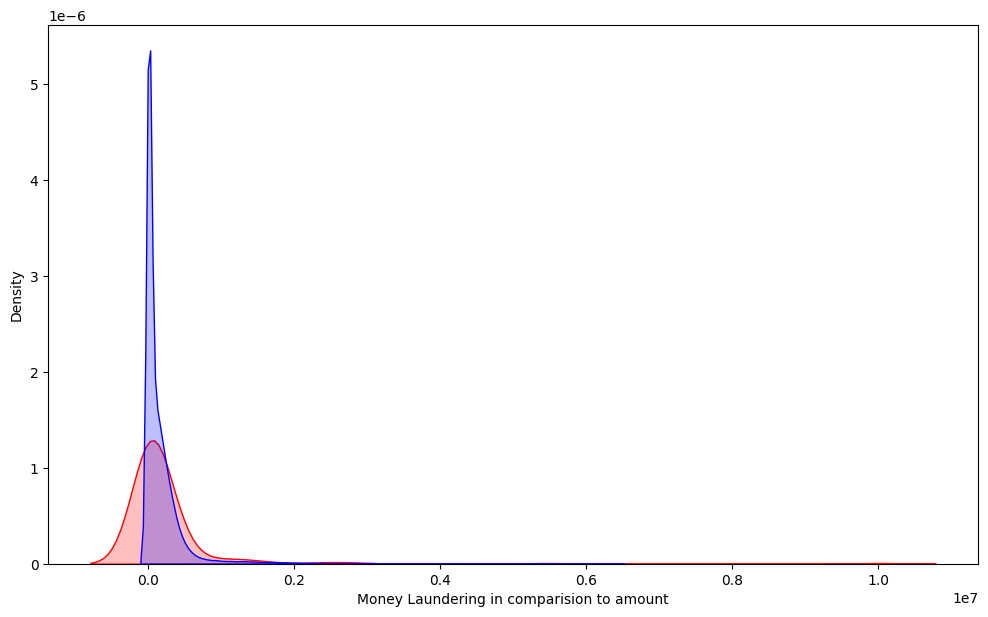

In [16]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

Fraud_df =data[data['isFraud'] == 1]
NoFraud_df = data[data['isFraud'] == 0]

plt.figure(figsize=(12,7))

sns.kdeplot(ML_df['amount'], label = 'Money Laundered Txn', fill = True, color = 'r')
sns.kdeplot(NoML_df['amount'], label = 'Not Money Laundered Txn', fill = True, color = 'b')

plt.xlabel('Money Laundering in comparision to amount')

<Axes: >

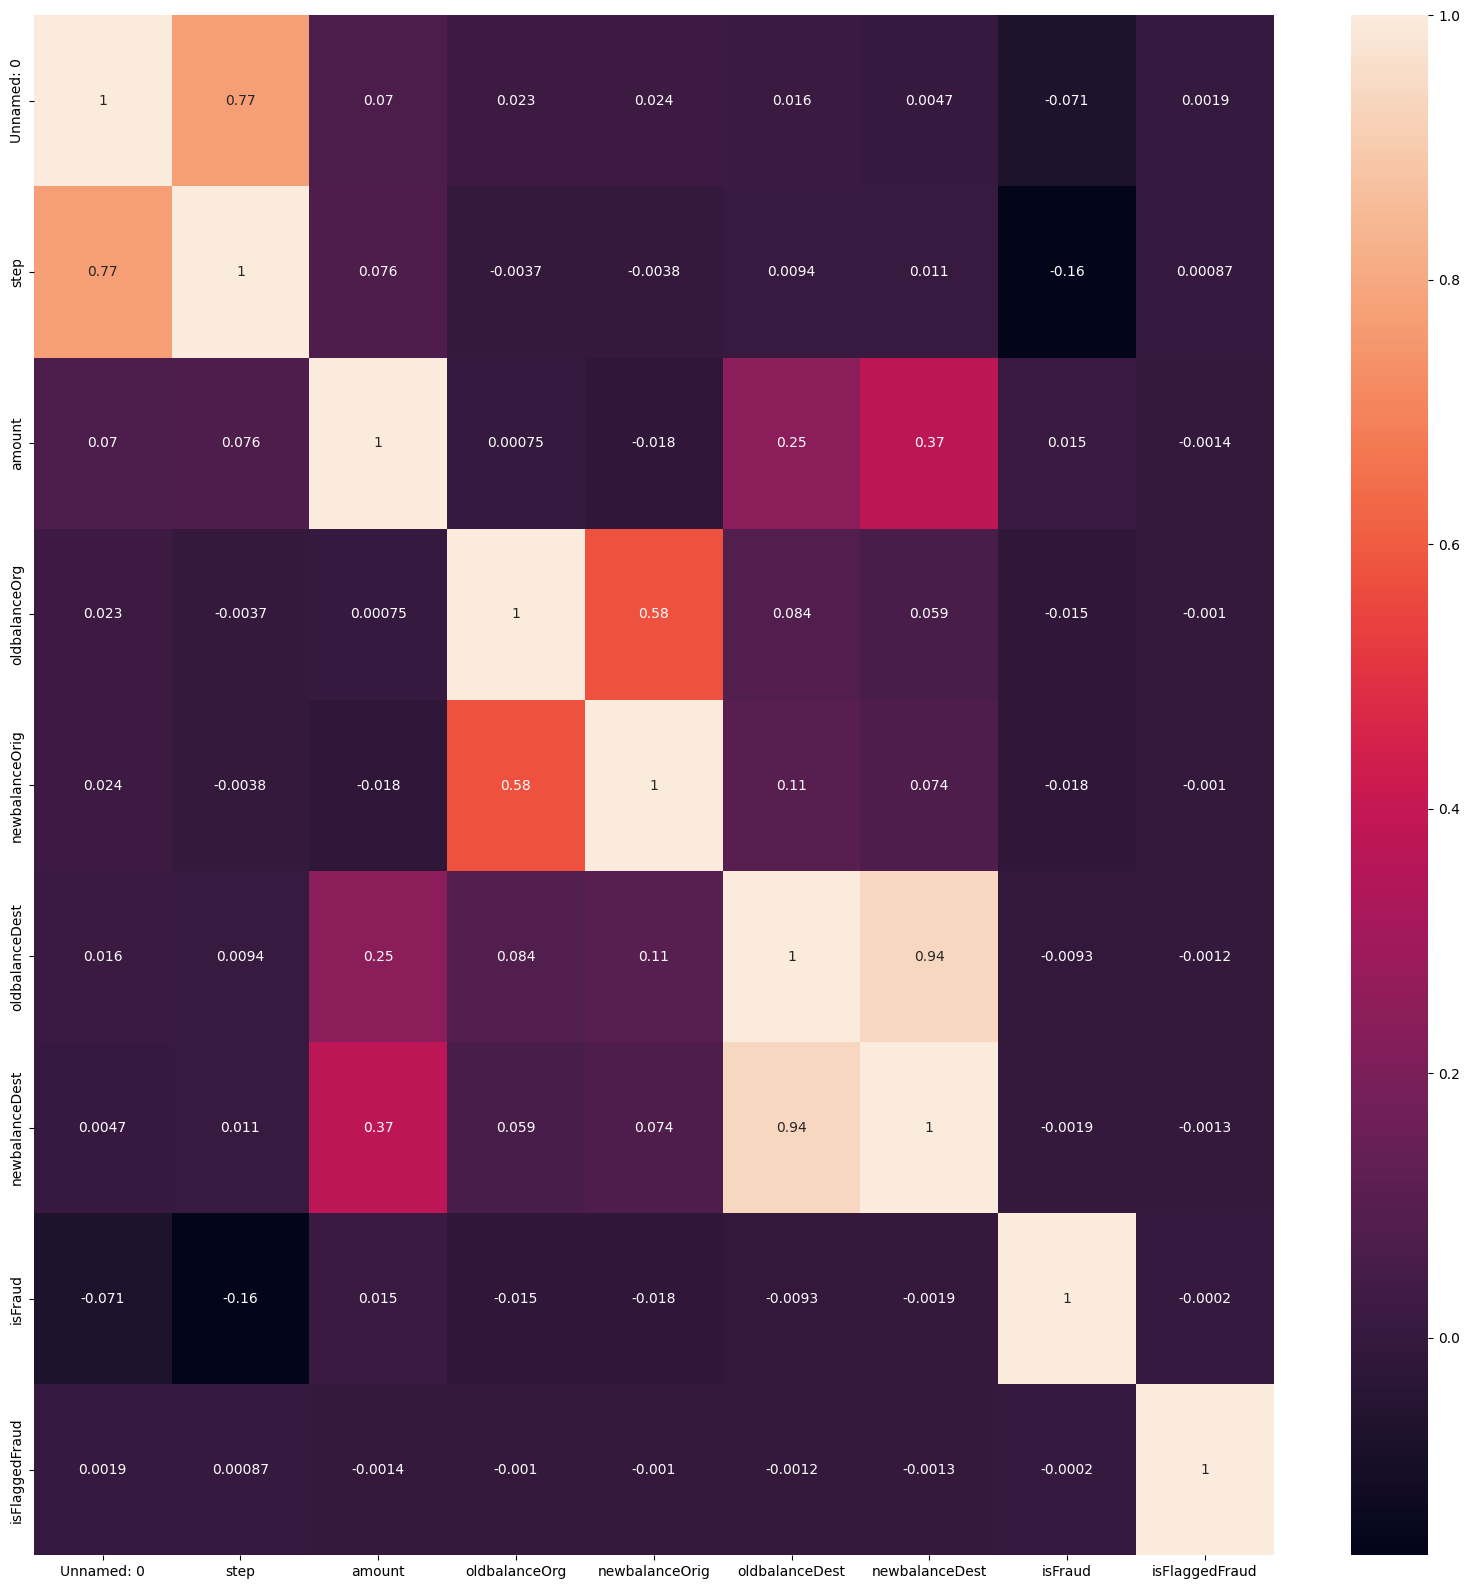

In [17]:
correlations = data.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [18]:
#Pre-processing of data
from sklearn.preprocessing import StandardScaler
col_names = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [19]:
#One hot code conductor
data_extract=data[['type','isFraud']]

type_dummies = pd.get_dummies(data_extract['type'], drop_first = True)
data_extract.drop(['type'], axis=1, inplace=True)
new_data=pd.concat([data_extract,type_dummies, scaled_features], axis=1, ignore_index=False)
new_data.head()
new_data.to_csv('Money_Laundering_Dataset.csv', index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_24312\53977616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_extract.drop(['type'], axis=1, inplace=True)


<Axes: >

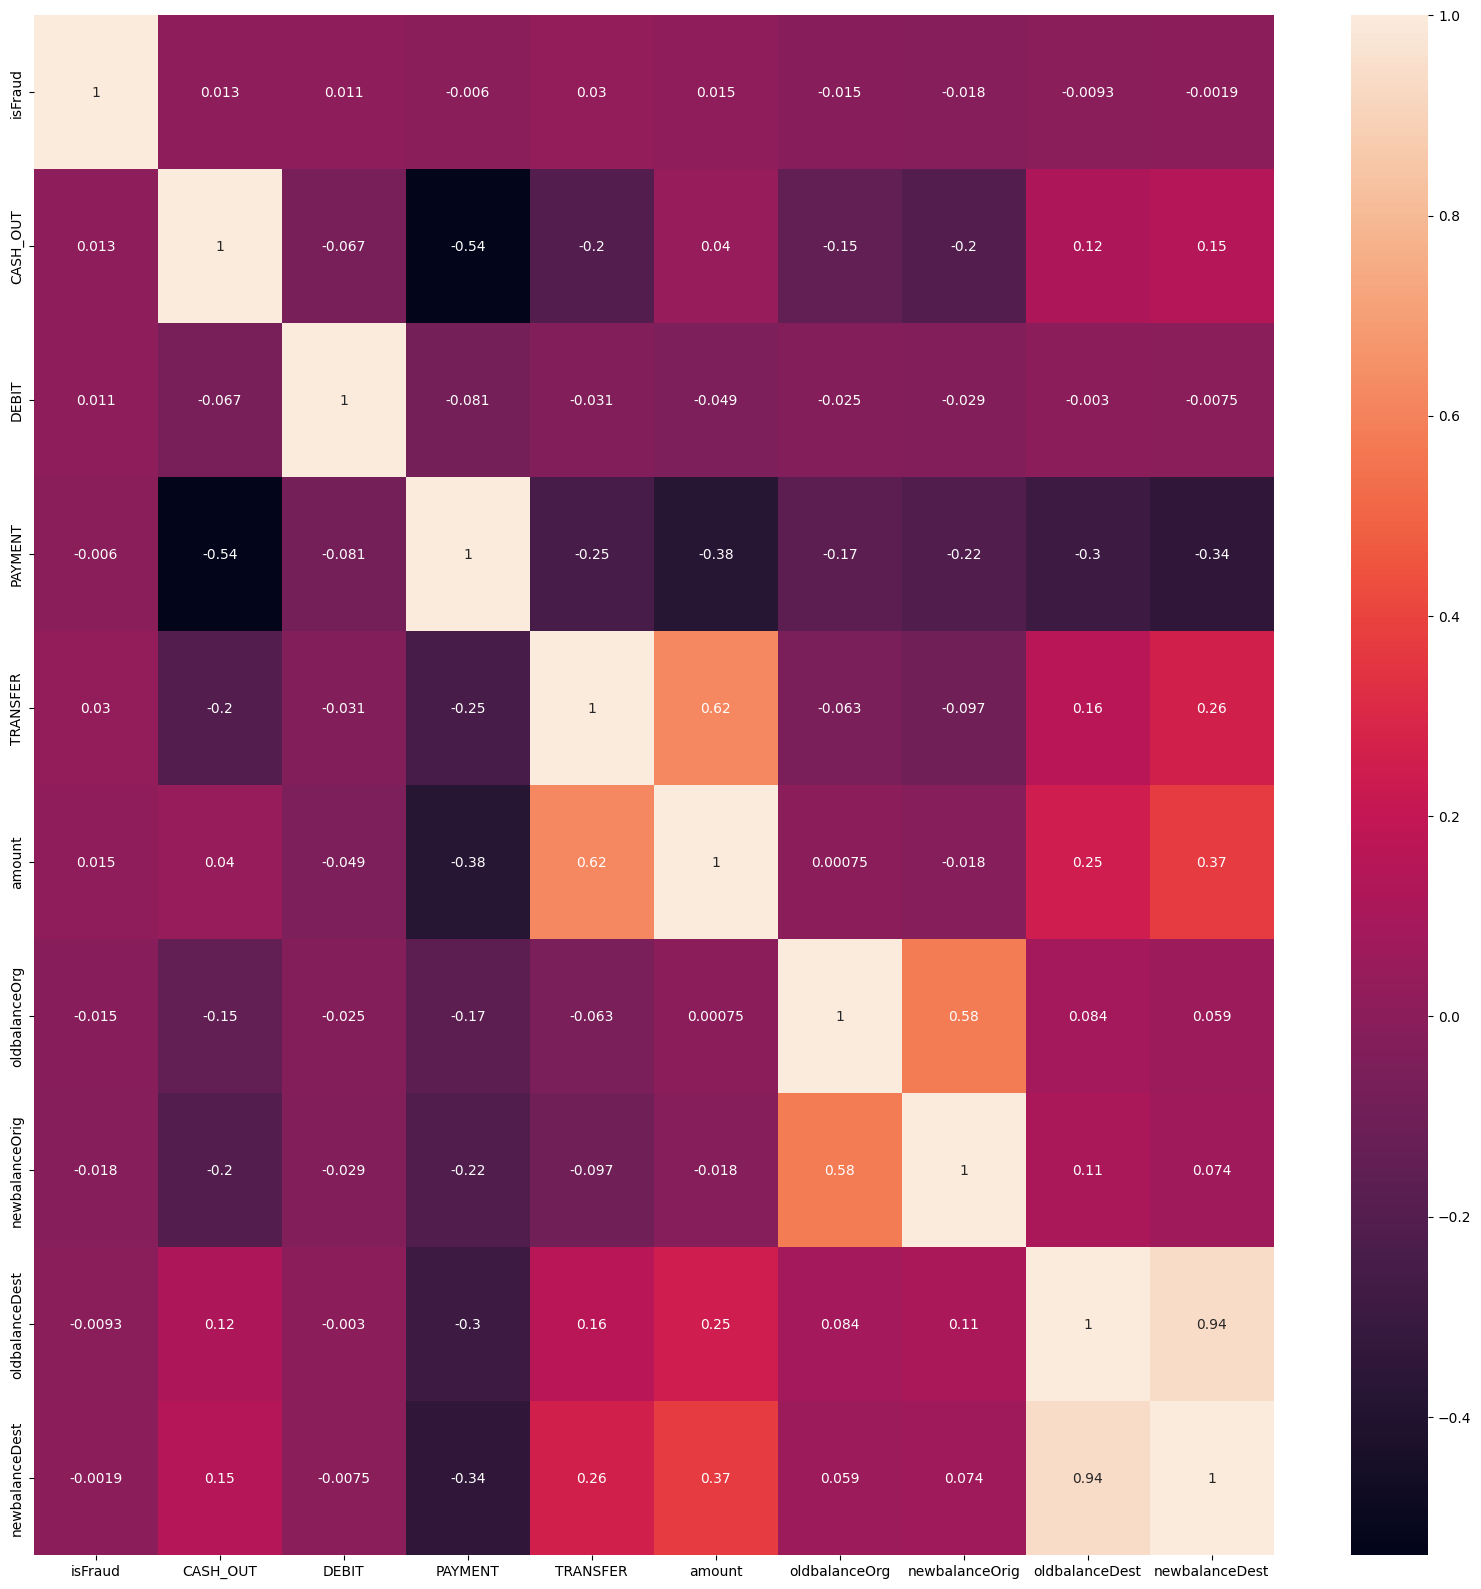

In [20]:
correlations = new_data.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [21]:
#no visible co-relation
#Training and deployement of model

In [22]:
X = new_data.iloc[:, new_data.columns != 'isFraud']
y = new_data.iloc[:, new_data.columns == 'isFraud']

In [23]:
y.head()

,isFraud
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [24]:
X.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,1,0,-0.475641,-0.264677,-0.270632,-0.366413,-0.422519
1,0,0,1,0,-0.498805,-0.320372,-0.322604,-0.366413,-0.422519
2,0,0,0,1,-0.503694,-0.328253,-0.329753,-0.366413,-0.422519
3,1,0,0,0,-0.503694,-0.328253,-0.329753,-0.357595,-0.422519
4,0,0,1,0,-0.470330,-0.312776,-0.318731,-0.366413,-0.422519


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [26]:

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (70000, 9)
Number transactions y_train dataset:  (70000, 1)
Number transactions X_test dataset:  (30000, 9)
Number transactions y_test dataset:  (30000, 1)


In [27]:
X_train.shape

(70000, 9)

In [28]:
X_test.shape

(30000, 9)

In [29]:
#Decision Trees

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [30]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [31]:
y_pred = decision_tree.predict(X_test)

In [32]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29891
         1.0       0.10      0.12      0.11       109

    accuracy                           0.99     30000
   macro avg       0.55      0.56      0.55     30000
weighted avg       0.99      0.99      0.99     30000



In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X,y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,y_res, test_size = 0.3, random_state=0) 
print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

After OverSampling, the shape of X: (199170, 9)
After OverSampling, the shape of y: (199170, 1) 



In [34]:
print('No of Money Laundering transction: {} \n'.format(y_res == 1))
print('No of NOT Money Laundering transction: {} \n'.format(y_res == 0))

No of Money Laundering transction:         isFraud
0         False
1         False
2          True
3          True
4         False
...         ...
199165     True
199166     True
199167     True
199168     True
199169     True

[199170 rows x 1 columns] 

No of NOT Money Laundering transction:         isFraud
0          True
1          True
2         False
3         False
4          True
...         ...
199165    False
199166    False
199167    False
199168    False
199169    False

[199170 rows x 1 columns] 



In [35]:
decision_tree.fit(X_train_res,y_train_res.values.ravel())

DecisionTreeClassifier()

In [36]:

y_pred_res = decision_tree.predict(X_test_res)

In [37]:
y_res.value_counts()

isFraud
0.0        99585
1.0        99585
dtype: int64

In [38]:
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     29787
         1.0       0.94      0.96      0.95     29964

    accuracy                           0.95     59751
   macro avg       0.95      0.95      0.95     59751
weighted avg       0.95      0.95      0.95     59751



<Axes: >

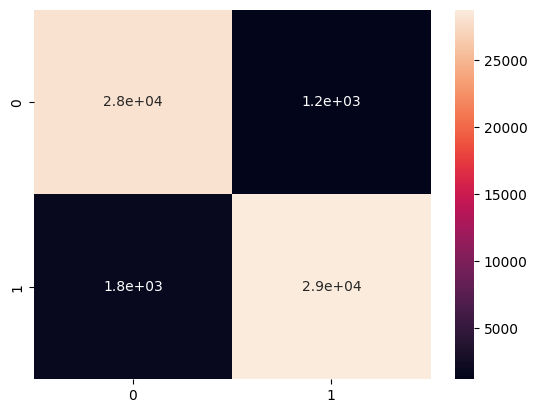

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_res, y_test_res)
sns.heatmap(cm, annot=True)

In [40]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [41]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [42]:
y_pred = random_forest.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29891
         1.0       0.36      0.08      0.13       109

    accuracy                           1.00     30000
   macro avg       0.68      0.54      0.57     30000
weighted avg       0.99      1.00      0.99     30000



In [48]:
random_forest.fit(X_train_res, y_train_res.values.ravel())

RandomForestClassifier()

In [49]:
y_pred_res = random_forest.predict(X_test_res)

In [57]:
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96     29787
         1.0       0.95      0.98      0.97     29964

    accuracy                           0.96     59751
   macro avg       0.96      0.96      0.96     59751
weighted avg       0.96      0.96      0.96     59751



In [60]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('decision_tree', decision_tree),
    ('random_forest', random_forest)
]




In [61]:
stack_model = StackingClassifier(
    estimators= estimator_list, final_estimator=LogisticRegression()
)

In [62]:
stack_model.fit(X_train_res, y_train_res.values.ravel())

StackingClassifier(estimators=[('decision_tree', DecisionTreeClassifier()),
                               ('random_forest', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [65]:
y_pred_res = stack_model.predict(X_test_res)

In [72]:
X_train_res

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
134471,0,0,1,0,-0.486498,-0.327669,-0.329753,-0.366413,-0.422519
161586,0,0,1,0,-0.473324,-0.328320,-0.329481,-0.366413,-0.422519
90232,1,0,0,0,0.743152,-0.074511,-0.329753,0.146233,0.170139
88611,0,0,0,1,0.948732,0.901821,-0.329753,-0.328100,-0.211168
195432,0,0,1,0,-0.479213,0.050881,-0.291729,-0.366413,-0.422519
...,...,...,...,...,...,...,...,...,...
152315,0,0,1,0,-0.503209,-0.328320,-0.329753,-0.366413,-0.422519
176963,1,0,0,0,-0.346682,-0.328187,-0.329753,-0.332747,-0.418331
117952,0,0,0,1,-0.473543,-0.316660,-0.329753,-0.366413,-0.422519
173685,0,0,0,1,6.494044,0.374503,-0.329753,-0.119506,-0.419678


In [66]:
print(classification_report(y_test_res, y_pred_res))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     29787
         1.0       0.96      0.97      0.97     29964

    accuracy                           0.97     59751
   macro avg       0.97      0.97      0.97     59751
weighted avg       0.97      0.97      0.97     59751



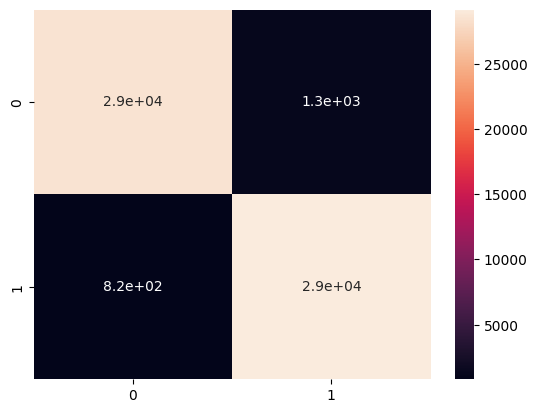

In [67]:
cm_stacked = confusion_matrix(y_test_res, y_pred_res)
sns.heatmap(cm_stacked, annot=True)
plt.show()

In [68]:
import pickle

In [70]:
with open('stacked_model.pkl', 'wb') as f:
    pickle.dump(stack_model, f)

In [71]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_res, y_pred_res)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.52%


In [ ]:
conf_matrix = confusion_matrix(y_test_res, y_pred_res)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()